In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("/kaggle/input/water-quality-and-potability/water_potability.csv")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [34]:
matrix_corr = df.corr()

In [35]:
matrix_corr["Potability"].sort_values(ascending = False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64

# De acordo com a matriz de correlações, não existe nenhuma coluna com uma correlação significativa no valor da coluna 'Potability'

In [36]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

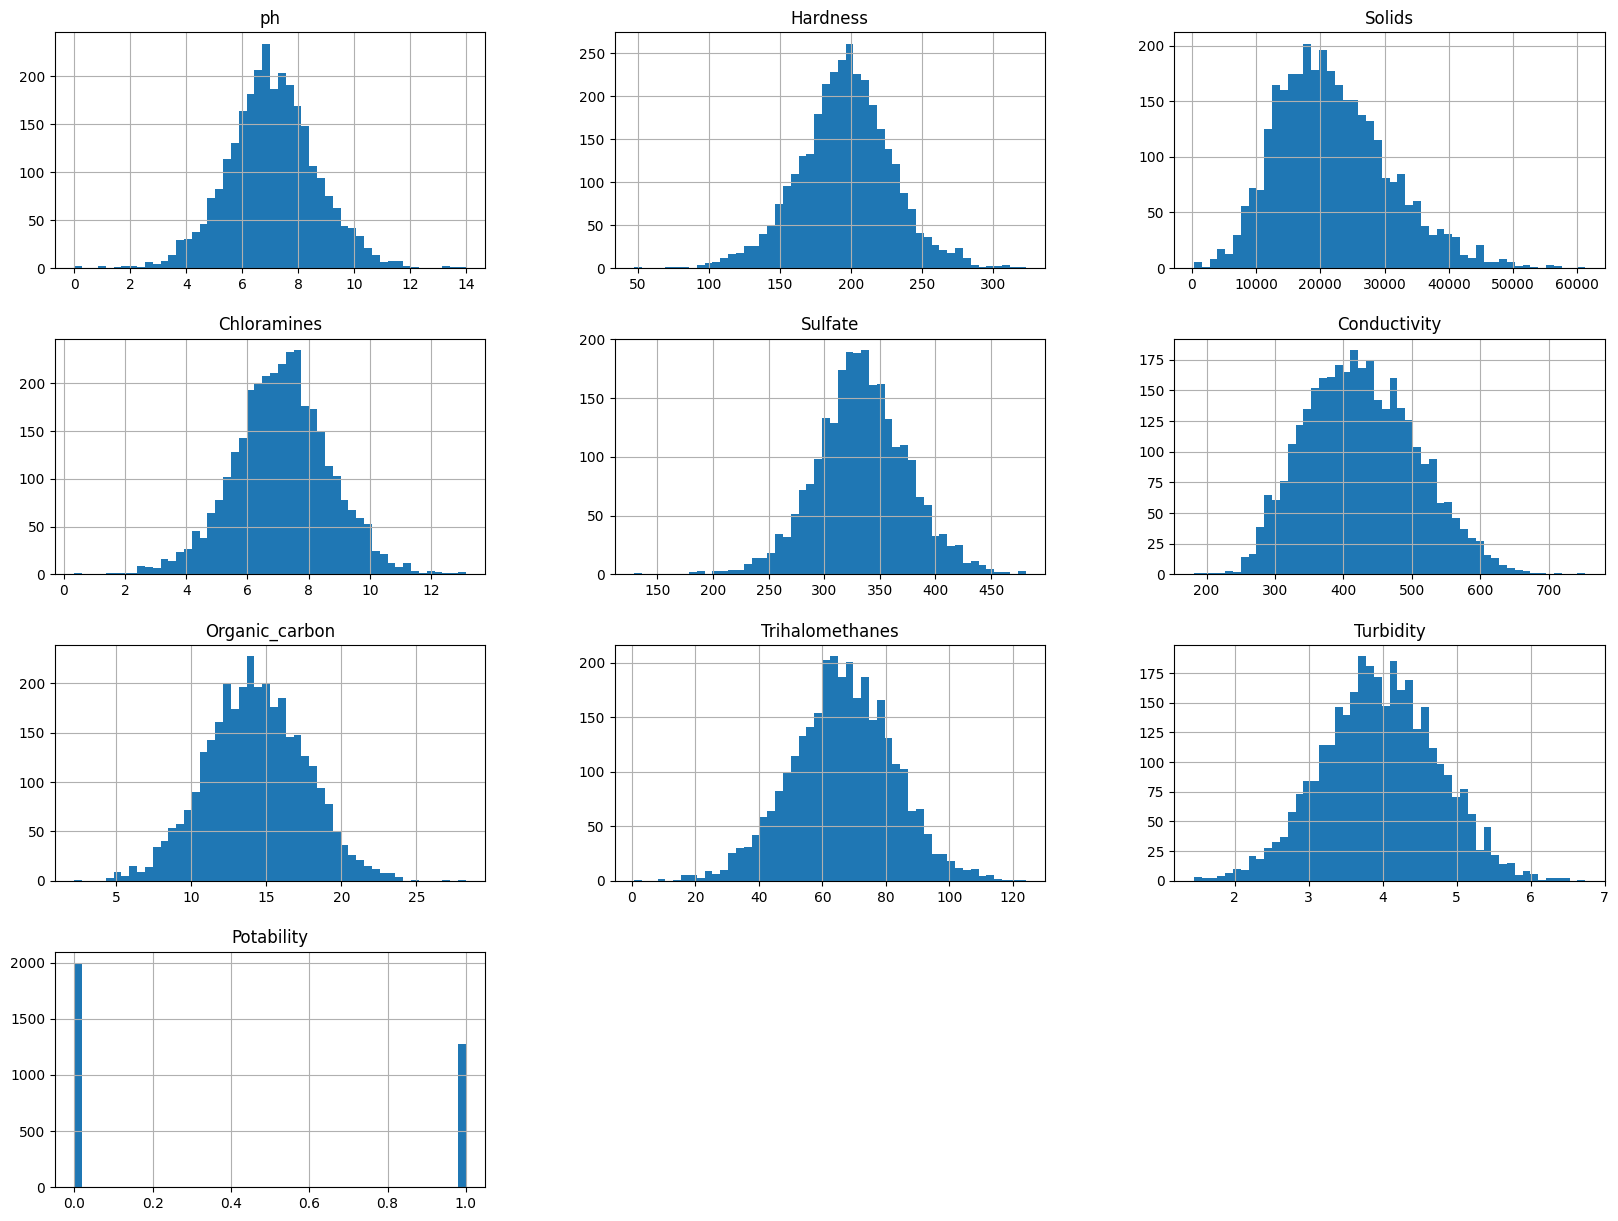

In [37]:
df.hist(bins=50,figsize=(20,15))

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [39]:
lr = LinearRegression()

In [40]:
it_imputer = IterativeImputer(estimator = lr)

In [41]:
df_t =  pd.DataFrame(it_imputer.fit_transform(df),columns = it_imputer.get_feature_names_out())

In [42]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   float64
dtypes: float64(10)
memory usage: 256.1 KB


array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

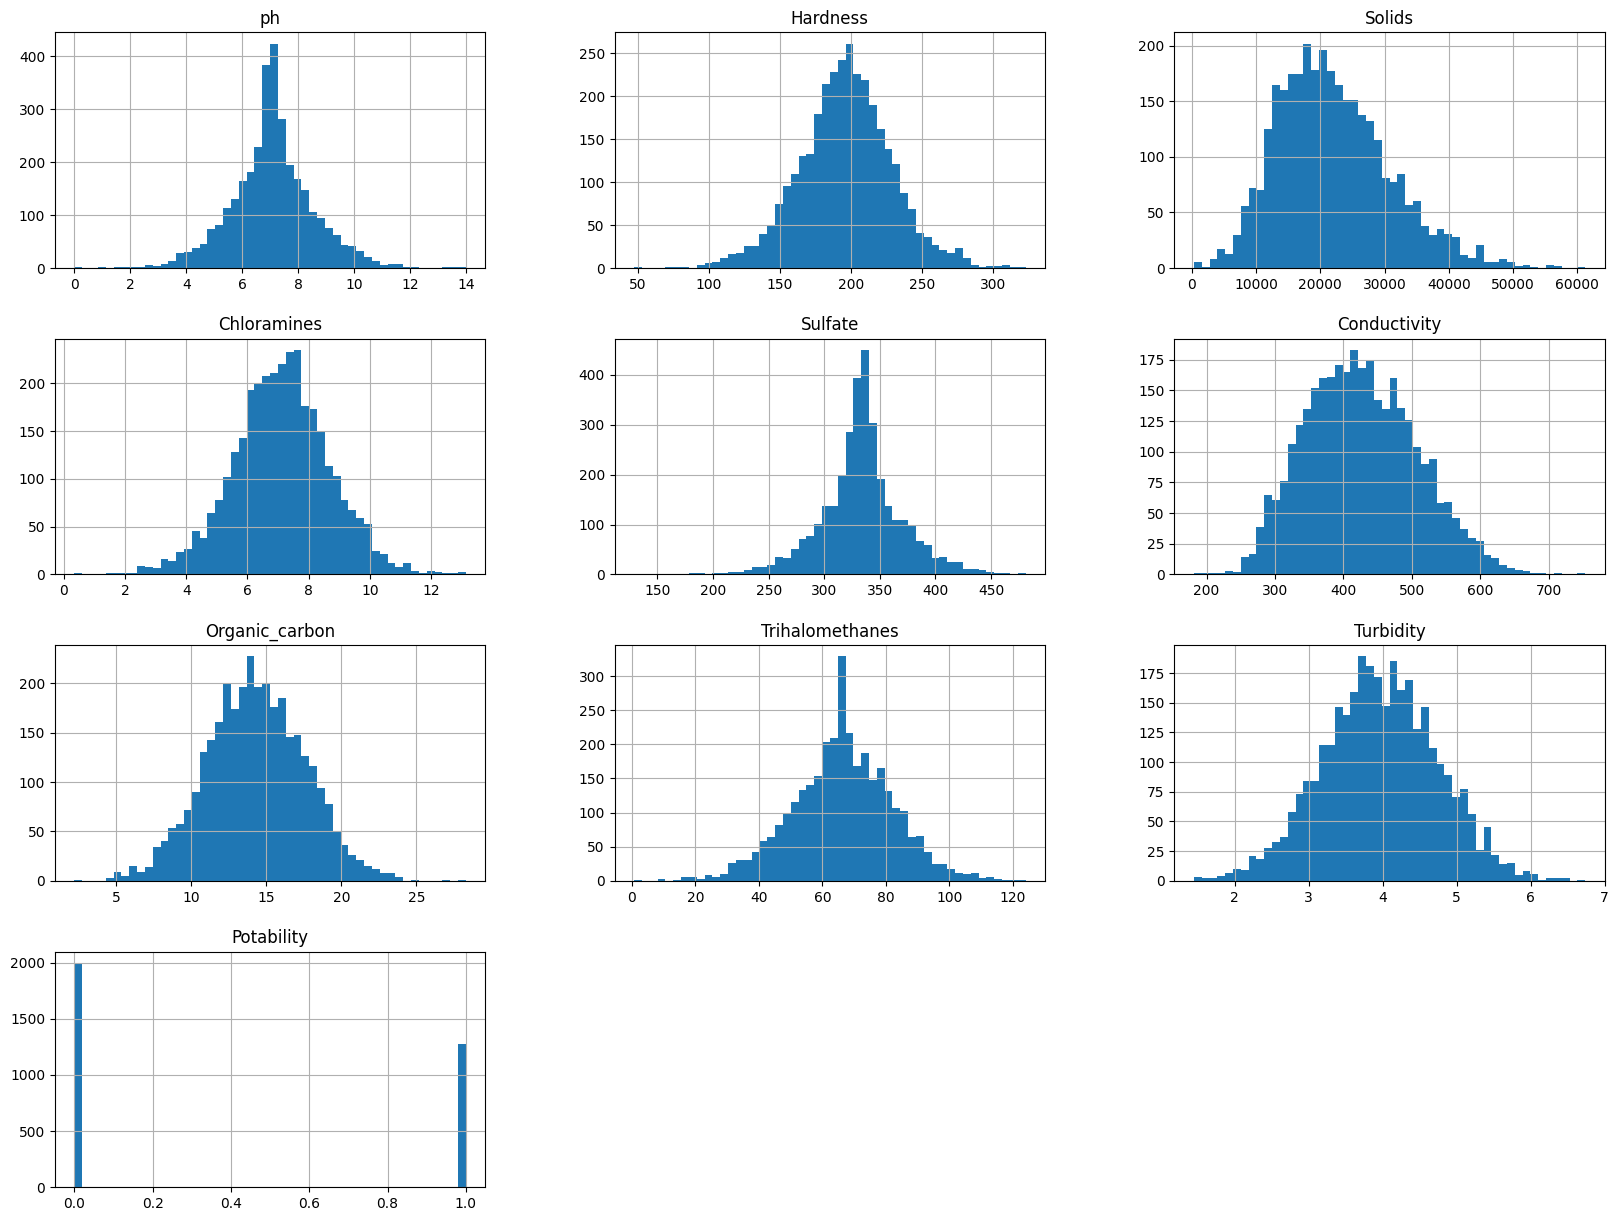

In [43]:
df_t.hist(bins=50,figsize=(20,15))

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
df_labels = df_t["Potability"]

In [46]:
df_features = df_t.drop("Potability", axis=1)

In [47]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
dtypes: float64(9)
memory usage: 230.5 KB


In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size = 0.25, random_state = 42)

In [49]:
def test_size_opt(model):
    scores_max = 0.01
    test_size_var = 0.05
    while test_size_var <= 0.6:
        X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size = test_size_var, random_state = 42)
        scores = cross_val_score(model, X_train, y_train, cv=10)
        test_size_var += 0.05
        if scores.mean() > scores_max:
            scores_max = scores.mean()
            best_test_size = test_size_var
    print(f"Melhor test_size: {best_test_size:.2f}\nMáxima média de score: {scores_max:.2f}")

# Regressão Logística

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [52]:
lr = LogisticRegression(max_iter=1000)

In [53]:
lr_modelo = lr.fit(X_train,y_train)

In [54]:
lr_modelo.score(X_test, y_test)

0.6227106227106227

In [55]:
scores = cross_val_score(lr, X_train, y_train, cv=10)
print(f"Média de {scores.mean():.2f} e desvio padrão de {scores.std():.2f}")

Média de 0.61 e desvio padrão de 0.00


In [56]:
test_size_opt(lr)

Melhor test_size: 0.15
Máxima média de score: 0.61


# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier()

In [59]:
test_size_opt(knn)

Melhor test_size: 0.25
Máxima média de score: 0.56


Otimizando a divisão de treinamento e teste 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size = 0.25, random_state = 42)

Testando o modelo sem ajuste de parâmetros :

In [61]:
knn_modelo = knn.fit(X_train, y_train)

In [62]:
knn_modelo.score(X_test, y_test)

0.5457875457875457

In [63]:
scores = cross_val_score(knn, X_train, y_train, cv=10)
print(f"Média de {scores.mean():.2f} e desvio padrão de {scores.std():.2f}")

Média de 0.56 e desvio padrão de 0.04


Vamos tentar achar os melhores parâmetros para o knn com o grid search :

In [64]:
grid_params_knn = {"n_neighbors":[21,22,23,24,25], 'weights':['uniform','distance'], 'algorithm':['ball_tree','kd_tree','brute'],"p":[1,2],"n_jobs":[-1,1]}

In [65]:
grid_search_knn = GridSearchCV(knn, grid_params_knn, cv=5)

In [66]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [-1, 1], 'n_neighbors': [21, 22, 23, 24, 25],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [67]:
grid_search_knn.best_params_

{'algorithm': 'ball_tree',
 'n_jobs': -1,
 'n_neighbors': 22,
 'p': 1,
 'weights': 'uniform'}

Vamos agora criar outro modelo com os parâmetros encontrados no grid search :

In [68]:
knn_otimizado = KNeighborsClassifier(n_neighbors=22,algorithm='ball_tree',n_jobs=-1,p=1)

In [69]:
knn_modelo_otimizado = knn_otimizado.fit(X_train, y_train)

In [70]:
knn_modelo_otimizado.score(X_test, y_test)

0.6153846153846154

Podemos perceber que em comparação com o modelo sem ajustes de parâmetros foi aumentado o score em 0.07 usando o gridsearch

# SVC

In [71]:
from sklearn.svm import SVC

In [72]:
svc = SVC()

In [73]:
svc_modelo = svc.fit(X_train, y_train)

In [74]:
svc.score(X_test, y_test)

0.6227106227106227

In [75]:
test_size_opt(svc)

Melhor test_size: 0.15
Máxima média de score: 0.61


In [76]:
scores = cross_val_score(svc, X_train, y_train, cv=10)
print(f"Média de {scores.mean():.2f} e desvio padrão de {scores.std():.2f}")

Média de 0.61 e desvio padrão de 0.00


# Árvore de decisão

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
tree = DecisionTreeClassifier()

In [79]:
tree_modelo = tree.fit(X_train, y_train)

In [80]:
tree_modelo.score(X_test, y_test)

0.6007326007326007

In [81]:
scores = cross_val_score(tree, X_train, y_train, cv=10)
print(f"Média de {scores.mean():.2f} e desvio padrão de {scores.std():.2f}")

Média de 0.59 e desvio padrão de 0.03


In [82]:
test_size_opt(tree)

Melhor test_size: 0.15
Máxima média de score: 0.60


# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc = RandomForestClassifier()

In [85]:
rfc_modelo = rfc.fit(X_train, y_train)

In [86]:
rfc_modelo.score(X_test, y_test)


0.6874236874236874

In [87]:
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print(f"Média de {scores.mean():.2f} e desvio padrão de {scores.std():.2f}")

Média de 0.68 e desvio padrão de 0.02


In [88]:
test_size_opt(rfc)

Melhor test_size: 0.10
Máxima média de score: 0.68
